In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

In [26]:
df=pd.read_csv("D:/back/projects_and_portfolio/Machine Learning/02_Classification/03_Logistic-Regression.ipynb/ChurnData.csv")
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [27]:
df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [28]:
X=np.asarray(df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:4]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.]])

In [29]:
Y=np.asarray(df[['churn']]).astype(int)
Y[0:4]

array([[1],
       [1],
       [0],
       [0]])

## remove outliar with IQR

In [30]:
# Convert the feature array back to a DataFrame for easier manipulation
feature_names = ['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']
X_df = pd.DataFrame(X, columns=feature_names)

# Calculate IQR for each feature
Q1 = X_df.quantile(0.25)
Q3 = X_df.quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers: any row where any feature is outside [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
outlier_filter = ~((X_df < (Q1 - 1.5 * IQR)) | (X_df > (Q3 + 1.5 * IQR))).any(axis=1)

# Apply filter to both features and target
X = X[outlier_filter]
Y = Y[outlier_filter]


## balance  our data

In [31]:
from sklearn.utils import resample

# Combine features and labels into one DataFrame for resampling
data_balanced = pd.DataFrame(X, columns=feature_names)
data_balanced['churn'] = Y

# Separate majority and minority classes
majority = data_balanced[data_balanced['churn'] == 0]
minority = data_balanced[data_balanced['churn'] == 1]

# Downsample majority class
majority_downsampled = resample(majority,
                                replace=False,
                                n_samples=len(minority),
                                random_state=42)

# Combine balanced dataset
df_balanced = pd.concat([majority_downsampled, minority])

# Final feature matrix and labels
X_final = df_balanced.drop('churn', axis=1).values
Y_final = df_balanced['churn'].values


## StandardScaler

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X[0:4]

array([[-1.10589487, -0.55740802, -0.40164782,  2.42604251,  1.73760172,
        -0.52070667, -0.85781645],
       [-0.05206661, -0.55740802,  0.13465986, -0.67431876, -0.64243835,
        -1.15689543, -0.85781645],
       [-0.53107945, -0.79629717, -0.18712475, -0.76462055, -1.43578504,
        -0.90241993, -0.85781645],
       [ 0.18743981, -0.39814859, -0.6161709 ,  0.62000682, -0.64243835,
         0.11548209,  1.16575056]])

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0).fit(X_train, Y_train)
lr

c:\ProgramData\anaconda3\envs\ai\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [35]:
Y_hat=lr.predict(X_test)
print(Y_test)
print(Y_hat)

[[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]]
[1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1]


In [36]:
Y_hat_proba=lr.predict_proba(X_test)
print(Y_test)
print(Y_hat_proba)

[[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]]
[[0.40608386 0.59391614]
 [0.48657448 0.51342552]
 [0.85925377 0.14074623]
 [0.69535732 0.30464268]
 [0.45741141 0.54258859]
 [0.44067691 0.55932309]
 [0.98021298 0.01978702]
 [0.7389257  0.2610743 ]
 [0.96413961 0.03586039]
 [0.37329957 0.62670043]
 [0.97501428 0.02498572]
 [0.48474858 0.51525142]
 [0.88155033 0.11844967]
 [0.93560325 0.06439675]
 [0.96961373 0.03038627]
 [0.77778978 0.22221022]
 [0.42304418 0.57695582]
 [0.70089446 0.29910554]
 [0.18904002 0.81095998]
 [0.9744779  0.0255221 ]
 [0.89231358 0.10768642]
 [0.9665464  0.0334536 ]
 [0.75696678 0.24303322]
 [0.36891893 0.63108107]
 [0.9190832  0.0809168 ]
 [0.34530191 0.65469809]
 [0.3955785  0.6044215 ]
 [0.8815846  0.1184

In [37]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_hat))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        45
           1       0.41      0.44      0.42        16

    accuracy                           0.69        61
   macro avg       0.60      0.61      0.61        61
weighted avg       0.69      0.69      0.69        61



In [38]:
from sklearn.metrics import jaccard_score
jaccard_score(Y_test, Y_hat,pos_label=0)


0.6481481481481481

In [39]:
jaccard_score

<function sklearn.metrics._classification.jaccard_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>

In [40]:
from sklearn.metrics import log_loss
log_loss(Y_test, Y_hat_proba)

0.5686142861814238

In [41]:
log_loss

<function sklearn.metrics._classification.log_loss(y_true, y_pred, *, normalize=True, sample_weight=None, labels=None)>

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_hat)
confusion_matrix

<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>

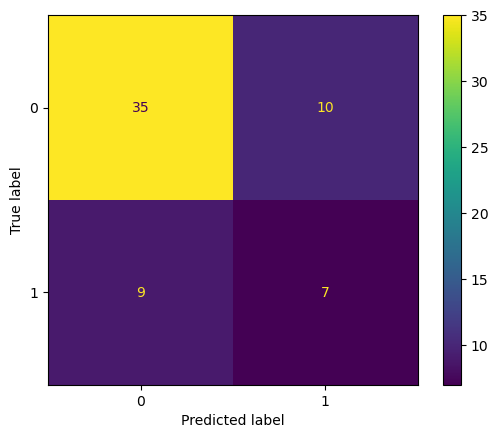

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Y_test, Y_hat)